In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Data File Read
df = pd.read_csv('.\\files\\amazon.csv', encoding='latin1')
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
    # Counting the unique state
    df.state.nunique()

23

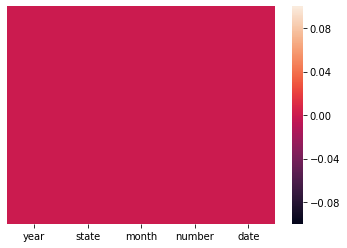

In [5]:
sns.heatmap(df.isnull(), yticklabels=False)

In [6]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [7]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

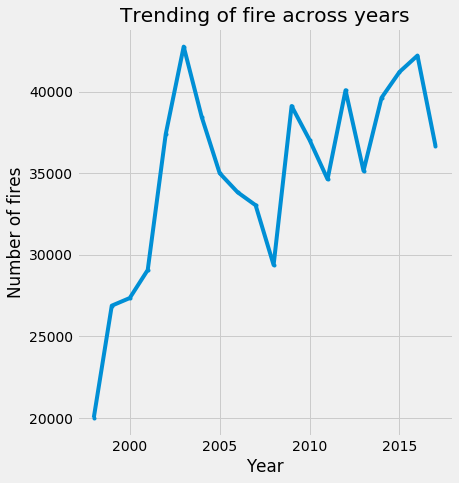

In [8]:
# Finding the forest fire trend across year

df_year = df.groupby('year').agg({'number':'sum'})
df_year = df_year.sort_values('year')
df_year.index

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (6, 7)

plt.plot(df_year.index, df_year.number, marker=".")
plt.xlabel('Year')
plt.ylabel('Number of fires')
plt.title('Trending of fire across years')
plt.xkcd()

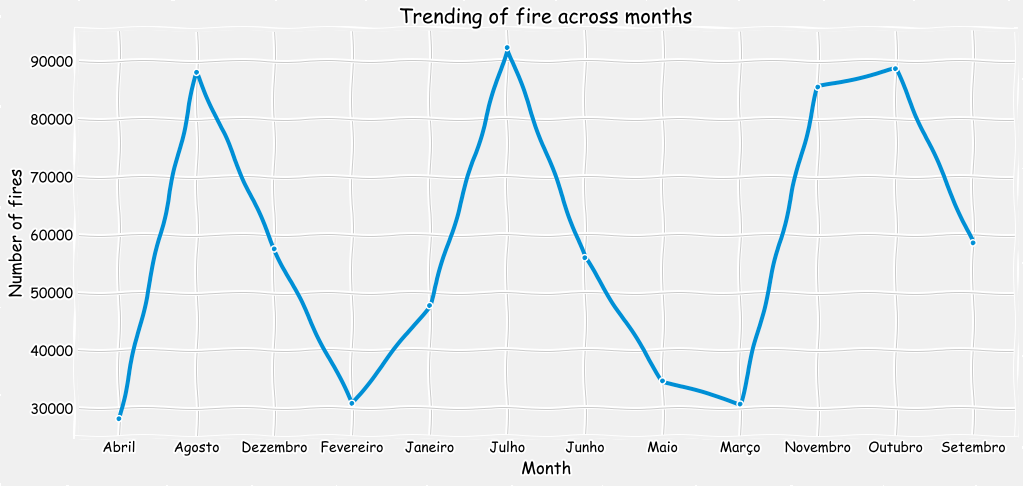

In [9]:
# Finding the forest fire trend across month

df_time = df.groupby('month').agg({'number':'sum'})
#df_time = df_time.sort_values('year')


plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (15, 7)

plt.plot(df_time.index, df_time.number, marker=".")
plt.xlabel('Month')
plt.ylabel('Number of fires')
plt.title('Trending of fire across months')
plt.xkcd()

([<matplotlib.patches.Wedge at 0x12aec730c18>,
 [Text(1.0911819295695324, 0.13900358477720007, 'Abril'),
  Text(0.8762317321011923, 0.6649947004743304, 'Agosto'),
  Text(0.2904491972033453, 1.060961480848354, 'Dezembro'),
  Text(-0.1426647680677628, 1.090709293969833, 'Fevereiro'),
  Text(-0.5112152042850513, 0.9739912807144597, 'Janeiro'),
  Text(-0.9867122407636146, 0.4862087555024559, 'Julho'),
  Text(-1.076080380715931, -0.22814691371626614, 'Junho'),
  Text(-0.8973075377855164, -0.6362697404664898, 'Maio'),
  Text(-0.6742648756385988, -0.8691184484752725, 'Março'),
  Text(-0.15065405822235928, -1.0896345051168004, 'Novembro'),
  Text(0.661823299267451, -0.8786295695836478, 'Outubro'),
  Text(1.0620890024089509, -0.28629870932639534, 'Setembro')],
 [Text(0.5951901434015631, 0.07582013715120002, '4.0%'),
  Text(0.47794458114610483, 0.3627243820769075, '12.6%'),
  Text(0.1584268348381883, 0.5787062622809204, '8.2%'),
  Text(-0.0778171462187797, 0.5949323421653634, '4.4%'),
  Text(-0.

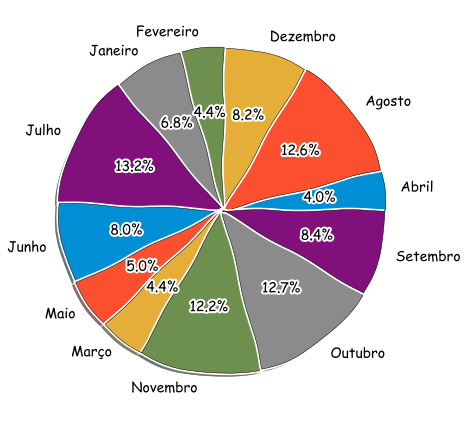

In [10]:
plt.pie(df_time.number, labels=df_time.index, shadow=True, wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')

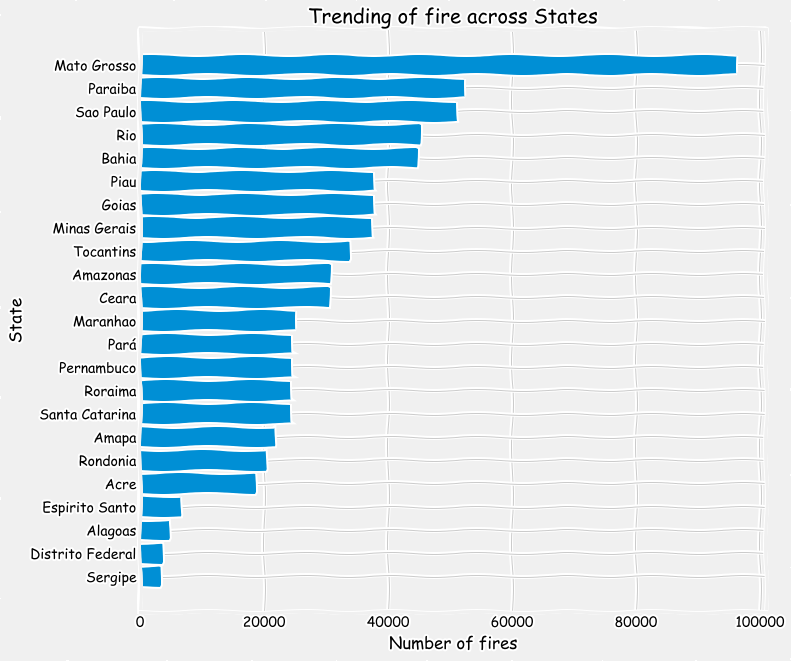

In [11]:
# Finding the forest fire trend across states

df_state = df.groupby('state').agg({'number':'sum'})
df_state = df_state.sort_values('number')
plt.rcParams["figure.figsize"] = (10, 10)
#print(plt.style.available)
plt.style.use('fivethirtyeight')
plt.barh(df_state.index, df_state.number)
plt.ylabel('State')
plt.xlabel('Number of fires')
plt.title('Trending of fire across States')
plt.xkcd()